In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error


### Data Preprocessing


### Description:
Cette cellule lit les données du fichier Excel ENB2012_data.xlsx et renomme les colonnes pour leur donner des noms plus explicites.

In [2]:
data = pd.read_excel('./data/ENB2012_data.xlsx')
cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Gazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
data.rename(columns={"X1": cols[0], "X2": cols[1], "X3": cols[2], "X4": cols[3], "X5": cols[4], "X6": cols[5], "X7": cols[6], "X8": cols[7], "Y1": cols[8], "Y2": cols[9], }, inplace=True)
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Gazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Normalisation des données
Cette cellule applique une normalisation min-max à trois colonnes du dataset : Surface Area, Wall Area et Roof Area. Cela consiste à ramener les valeurs de chaque colonne dans l'intervalle [0, 1].<br>
Le but est d'assurer que chaque caractéristique contribue de manière équilibrée à l’apprentissage.

In [3]:
# Normalisation des données
data['Surface Area'] = (data['Surface Area'] - data['Surface Area'].min()) / (data['Surface Area'].max() - data['Surface Area'].min())
data['Wall Area'] = (data['Wall Area'] - data['Wall Area'].min()) / (data['Wall Area'].max() - data['Wall Area'].min())
data['Roof Area'] = (data['Roof Area'] - data['Roof Area'].min()) / (data['Roof Area'].max() - data['Roof Area'].min())

### Modèle MLP avec Backpropagation
Cette classe encapsule la création, l'entraînement, l’évaluation et la visualisation des performances d’un modèle de régression basé sur un réseau de neurones multicouche.<br>
#####   Attributs
- **features_data, target_data :** données d’entrée (X) et de sortie (Y).
- **hidden_layer_sizes :** structure des couches cachées (ex. : (100,) ou (64, 64)).
- **activation :** fonction d’activation ('relu', 'tanh', 'logistic'…).
- **x_train, x_test, y_train, y_test :** division du jeu de données en jeu d'entraînement et de test (80/20).
#####   Méthodes
- **model_building():**
    - Crée un modèle MLPRegressor avec les paramètres donnés.
    - L’entraîne avec les données x_train et y_train.
    - Retourne le score de sur les données de test.
- **model_predictions(x_test=...):**
    - Retourne les prédictions du modèle sur des données test spécifiques (par défaut self.__x_test).
- **model_metrics():**
    - Calcule les indicateurs de performance :
        - **mse :** Mean Squared Error.
        - **rmse :** Root Mean Squared Error.
        - **mae :** Mean Absolute Error.
        - **mape :** Mean Absolute Percentage Error.
    - Retourne un dictionnaire de ces métriques.
- **model_performance_viz(model_target)**
    - Comparaison Heating Load et Cooling Load séparament : vraies valeurs vs. prédictions.
    - Métriques d’erreur sous forme de barres.
    - Courbe de perte du modèle.

 

In [4]:
class nn_back_propagation_model():
    def __init__(self, hidden_layer_sizes, features_data, target_data, activation):
        self.__features_data = features_data
        self.__target_data = target_data
        self.__hidden_layer_sizes = hidden_layer_sizes      
        self.__activation = activation      
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = train_test_split(self.__features_data, self.__target_data, test_size=0.2, random_state=1)   

    def model_building(self):
        self.__model = MLPRegressor(hidden_layer_sizes=self.__hidden_layer_sizes, max_iter=2000, activation=self.__activation, random_state=42, shuffle=False, learning_rate_init=0.001)  
        self.__model.fit(self.__x_train, self.__y_train)  
        return self.__model.score(self.__x_test, self.__y_test)
    
    def model_predictions(self, **kwargs):
        x_test = kwargs.get('x_test', self.__x_test)
        return self.__model.predict(x_test)
        
    def model_metrics(self):
        y_pred = self.__model.predict(self.__x_test)
        mse = mean_squared_error(y_true=self.__y_test, y_pred=y_pred)
        mae = mean_absolute_error(y_true=self.__y_test, y_pred=y_pred)
        rmse = root_mean_squared_error(y_true=self.__y_test, y_pred=y_pred)
        mape = mean_absolute_percentage_error(y_true=self.__y_test, y_pred=y_pred)
        return {"mse": mse, "rmse": rmse, "mae": mae, "mape": mape}
    
    def model_performance_viz(self, model_target):
        y_pred = self.__model.predict(self.__x_test)
        y_test = self.__y_test.values

        fig, axes = plt.subplots(2, 2, figsize=(18, 10))
        fig.suptitle(f"Performance du modèle {model_target}", fontsize=14)

        # Subplot 1: Heating Load
        axes[0][0].plot(y_pred[:, 0], label='Prédictions Heating', color='red', linestyle='--')
        axes[0][0].plot(y_test[:, 0], label='Vraies Heating', color='green')
        axes[0][0].set_title("Heating Load")
        axes[0][0].set_xlabel('Échantillons')
        axes[0][0].set_ylabel('Valeurs')
        axes[0][0].legend()
        axes[0][0].grid(True)

        # Subplot 2: Cooling Load
        axes[0][1].plot(y_pred[:, 1], label='Prédictions Cooling', color='red', linestyle='--')
        axes[0][1].plot(y_test[:, 1], label='Vraies Cooling', color='green')
        axes[0][1].set_title("Cooling Load")
        axes[0][1].set_xlabel('Échantillons')
        axes[0][1].set_ylabel('Valeurs')
        axes[0][1].legend()
        axes[0][1].grid(True)

        # Subplot 3: Error Metrics
        err_metrics = self.model_metrics()
        errs_labels = ["MSE", "RMSE", "MAE", "MAPE"]
        errs_nums = [err_metrics["mse"], err_metrics["rmse"], err_metrics["mae"], err_metrics["mape"]]
        bars = axes[1][0].bar(errs_labels, errs_nums, color=['skyblue', 'orange', 'lightgreen', 'pink'])
        axes[1][0].set_ylabel("Valeur d'erreur")
        axes[1][0].set_title("Métriques du modèle")
        for bar in bars:
            height = bar.get_height()
            axes[1][0].text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

        # Subplot 4: Courbe de perte
        if hasattr(self.__model, "loss_curve_"):
            axes[1][1].plot(self.__model.loss_curve_, color='purple')
            axes[1][1].set_title("Courbe de la perte")
            axes[1][1].set_xlabel("Itérations")
            axes[1][1].set_ylabel("Loss")
            axes[1][1].grid(True)
        else:
            axes[1][1].text(0.5, 0.5, "Pas de courbe de perte disponible", 
                            horizontalalignment='center', verticalalignment='center', transform=axes[1][1].transAxes)
            axes[1][1].set_title("Courbe de la perte")

        plt.tight_layout()
        plt.show()
        plt.close()


### models_scores_comparaison
Cette fonction permet de visualiser la comparaison des performances de plusieurs modèles de machine learning en affichant leurs scores sous forme de diagramme en barres.

In [5]:
def models_scores_comparaison(models_labels, models_scores):
    bars = plt.bar(models_labels, models_scores, color='orange')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Valeur du score')
    plt.title("comparaison des modéles en terms de score")
    plt.show()
    plt.close()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


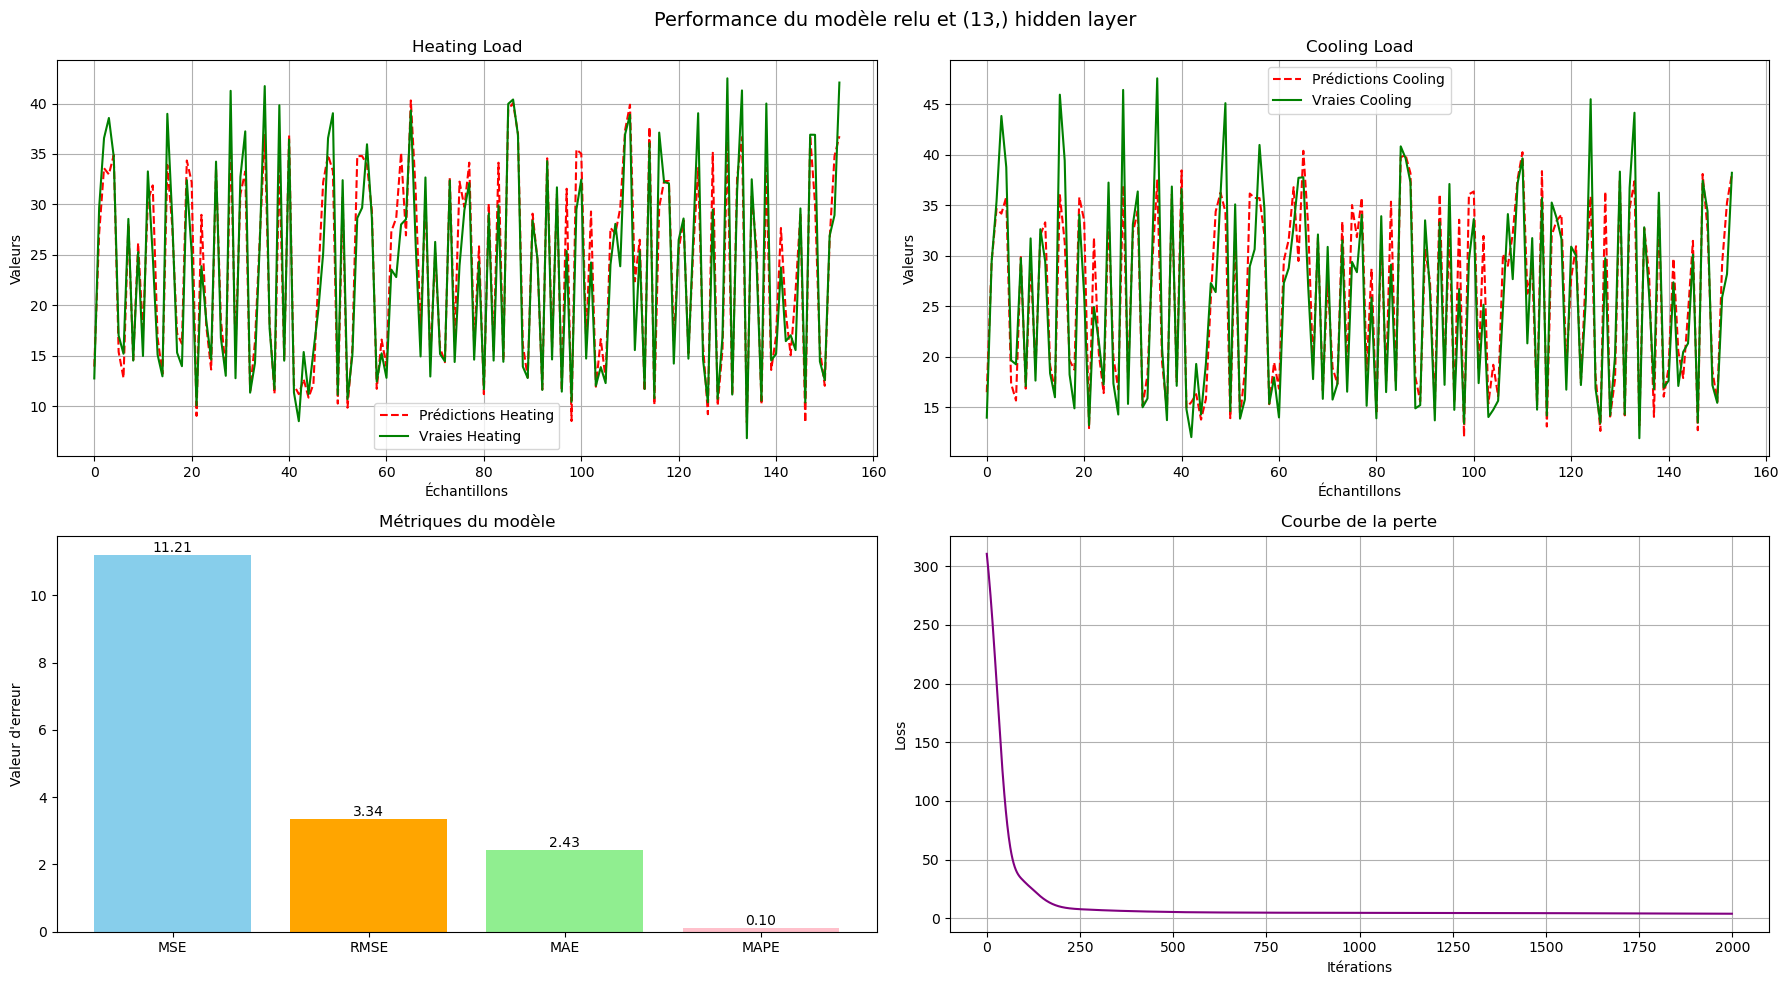

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


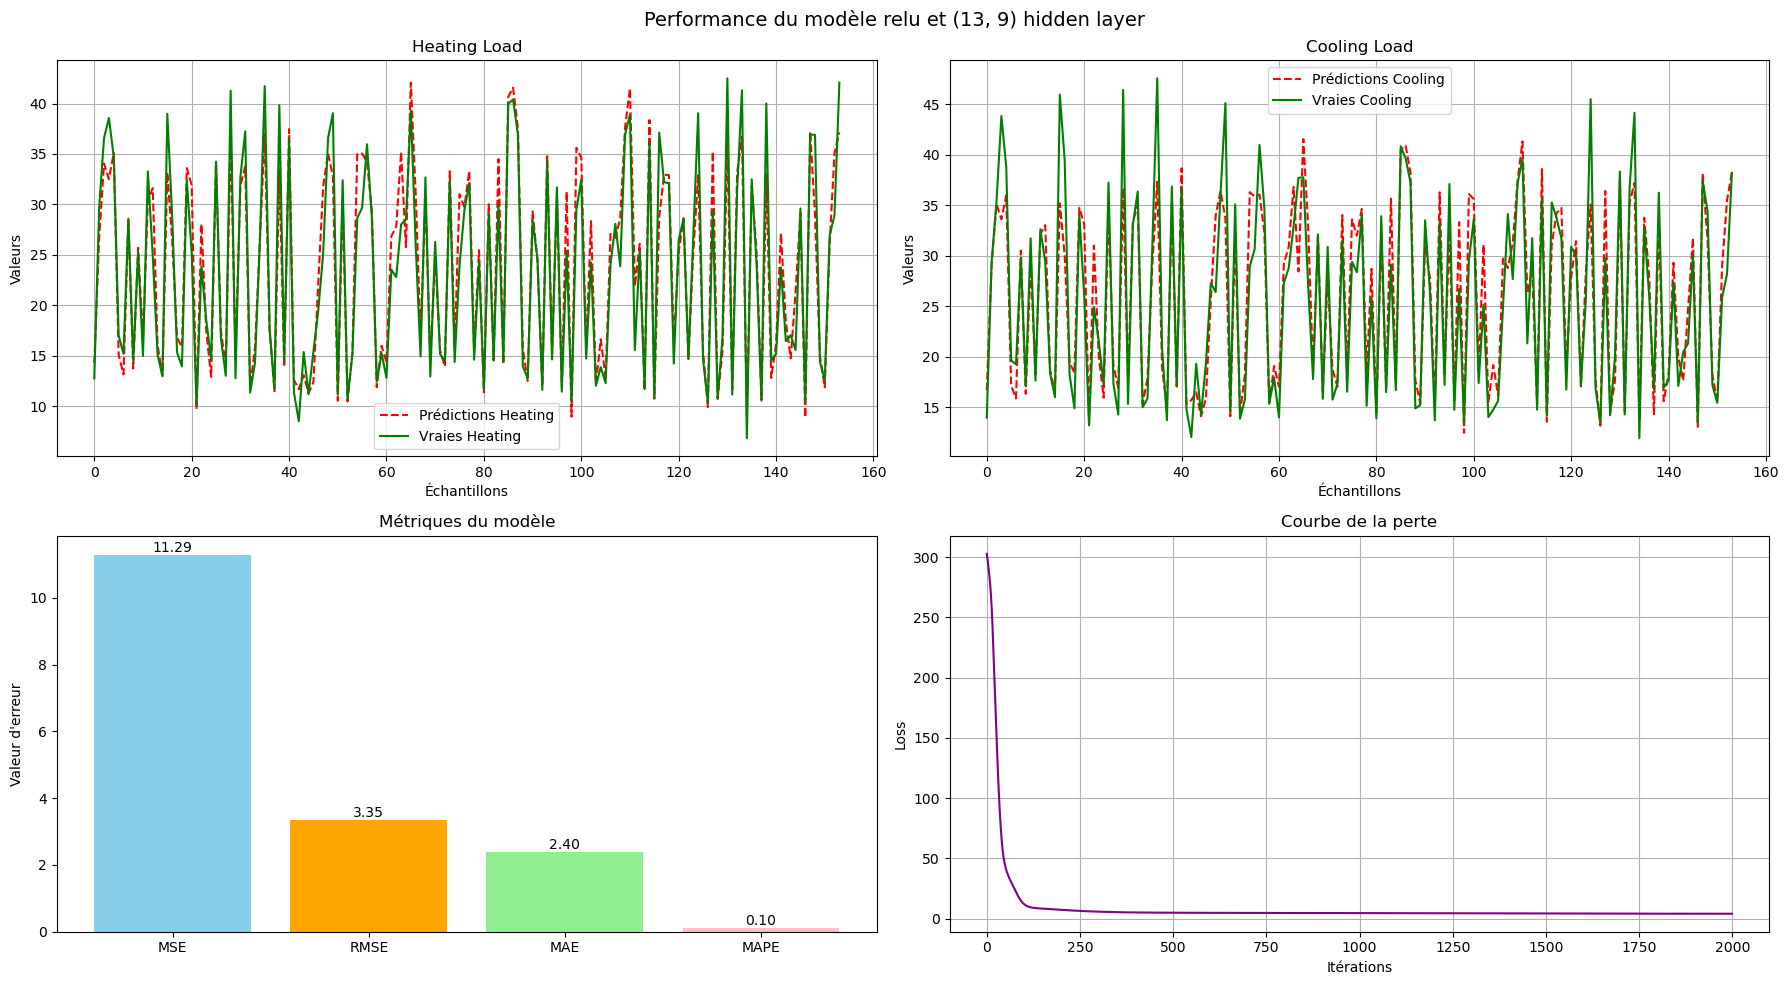

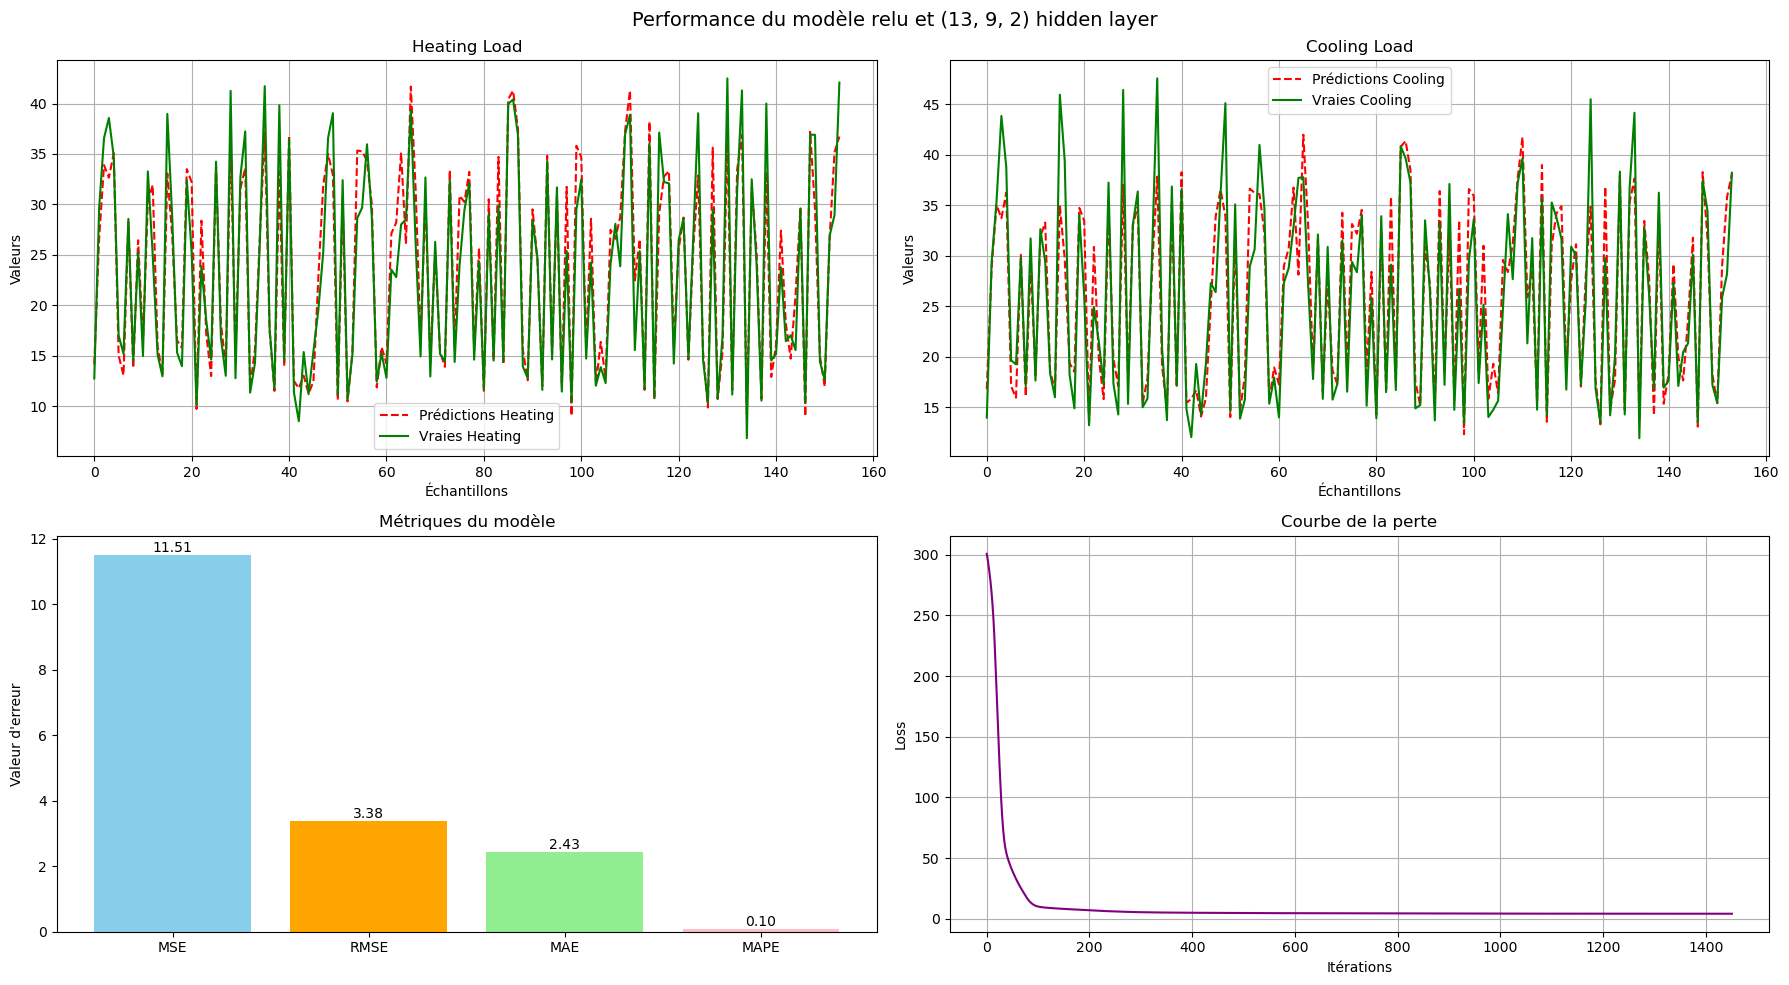

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


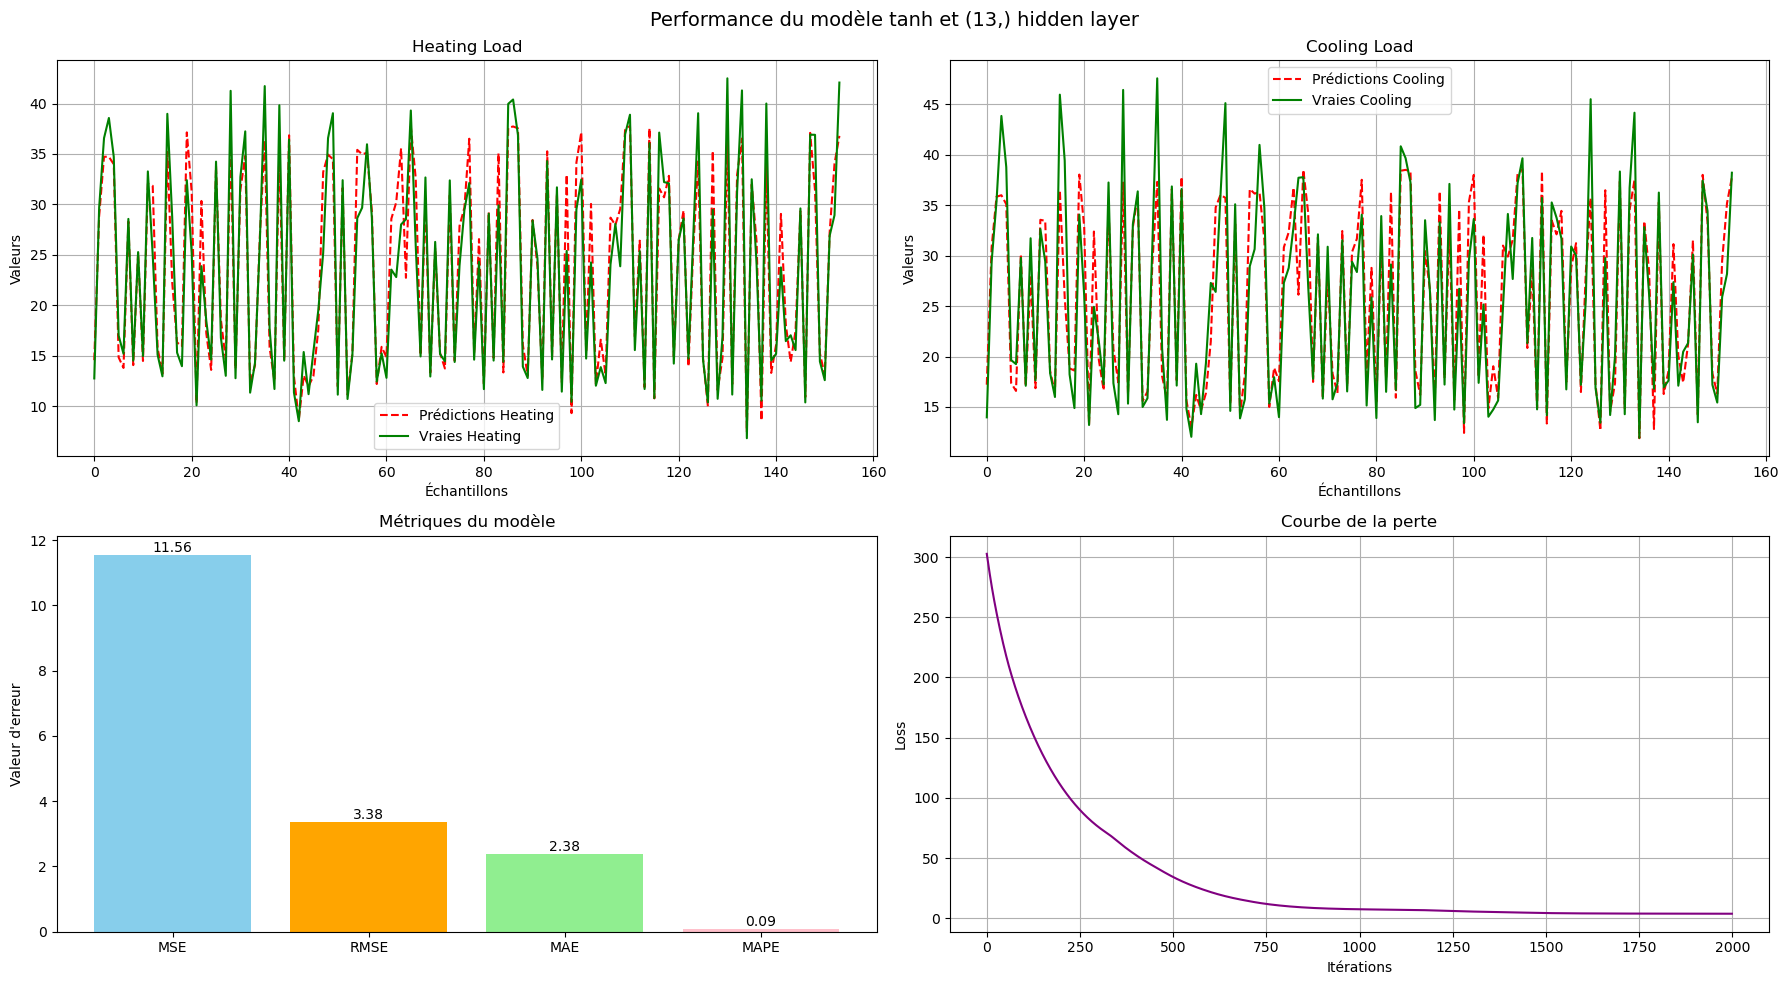

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


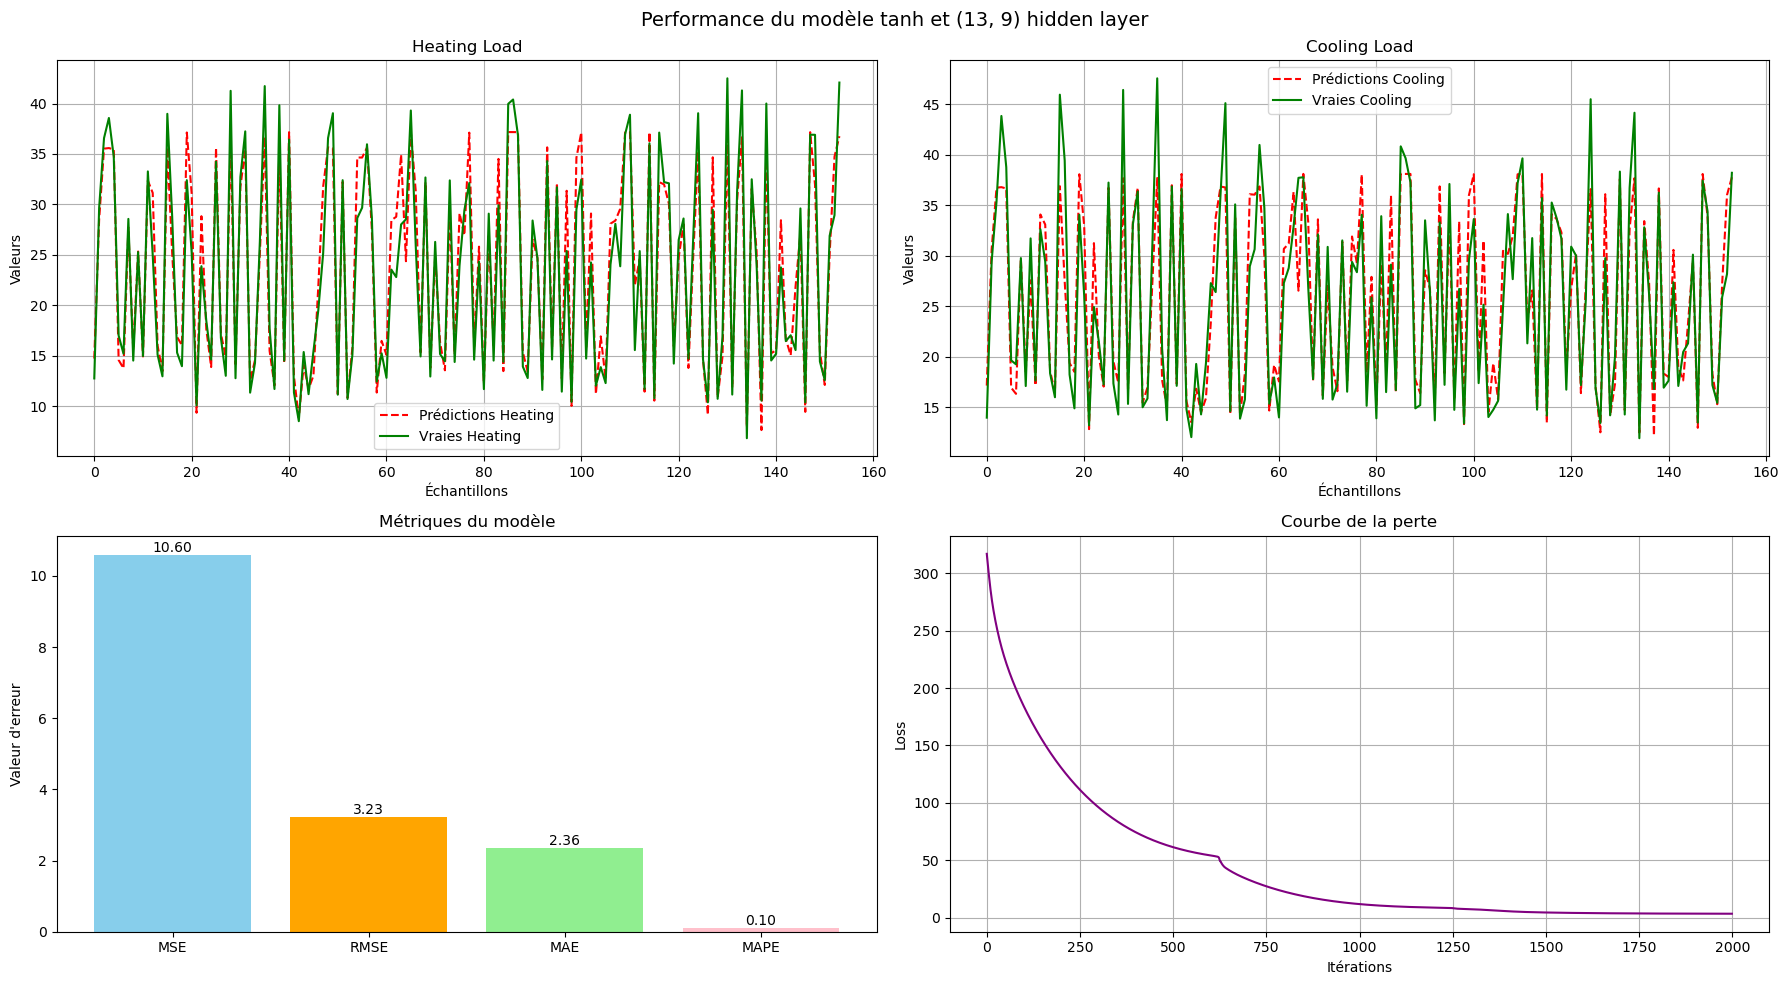

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


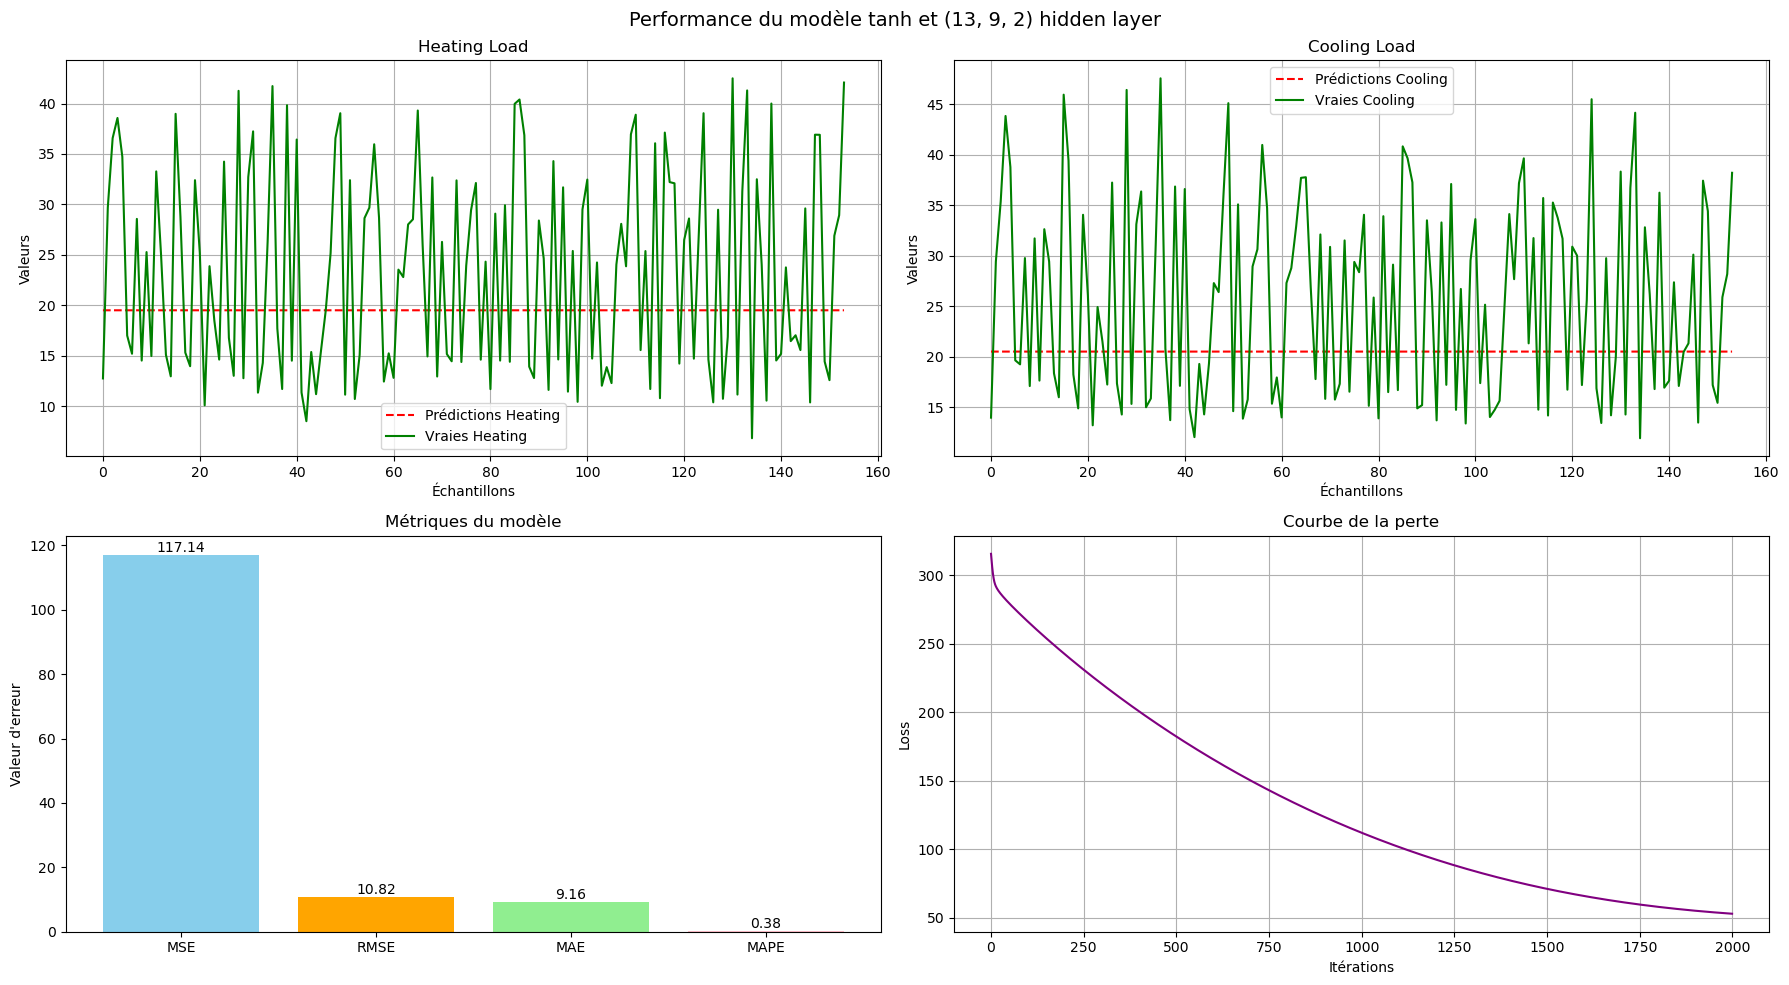

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


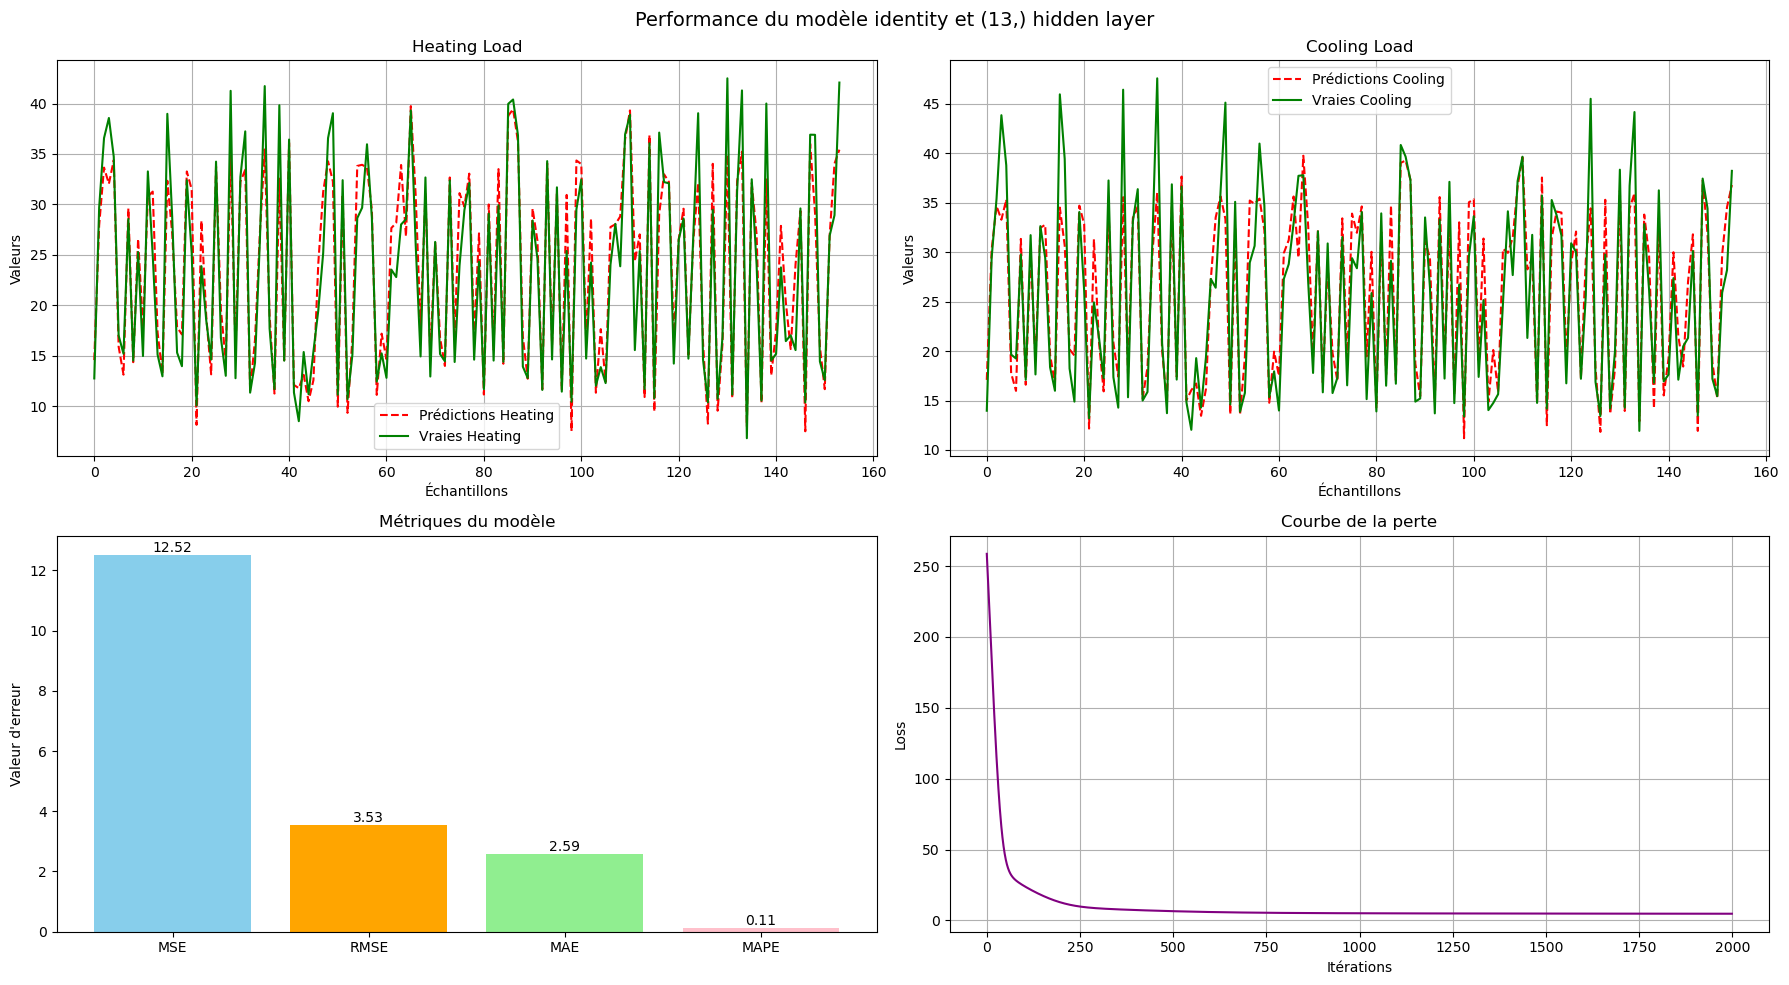

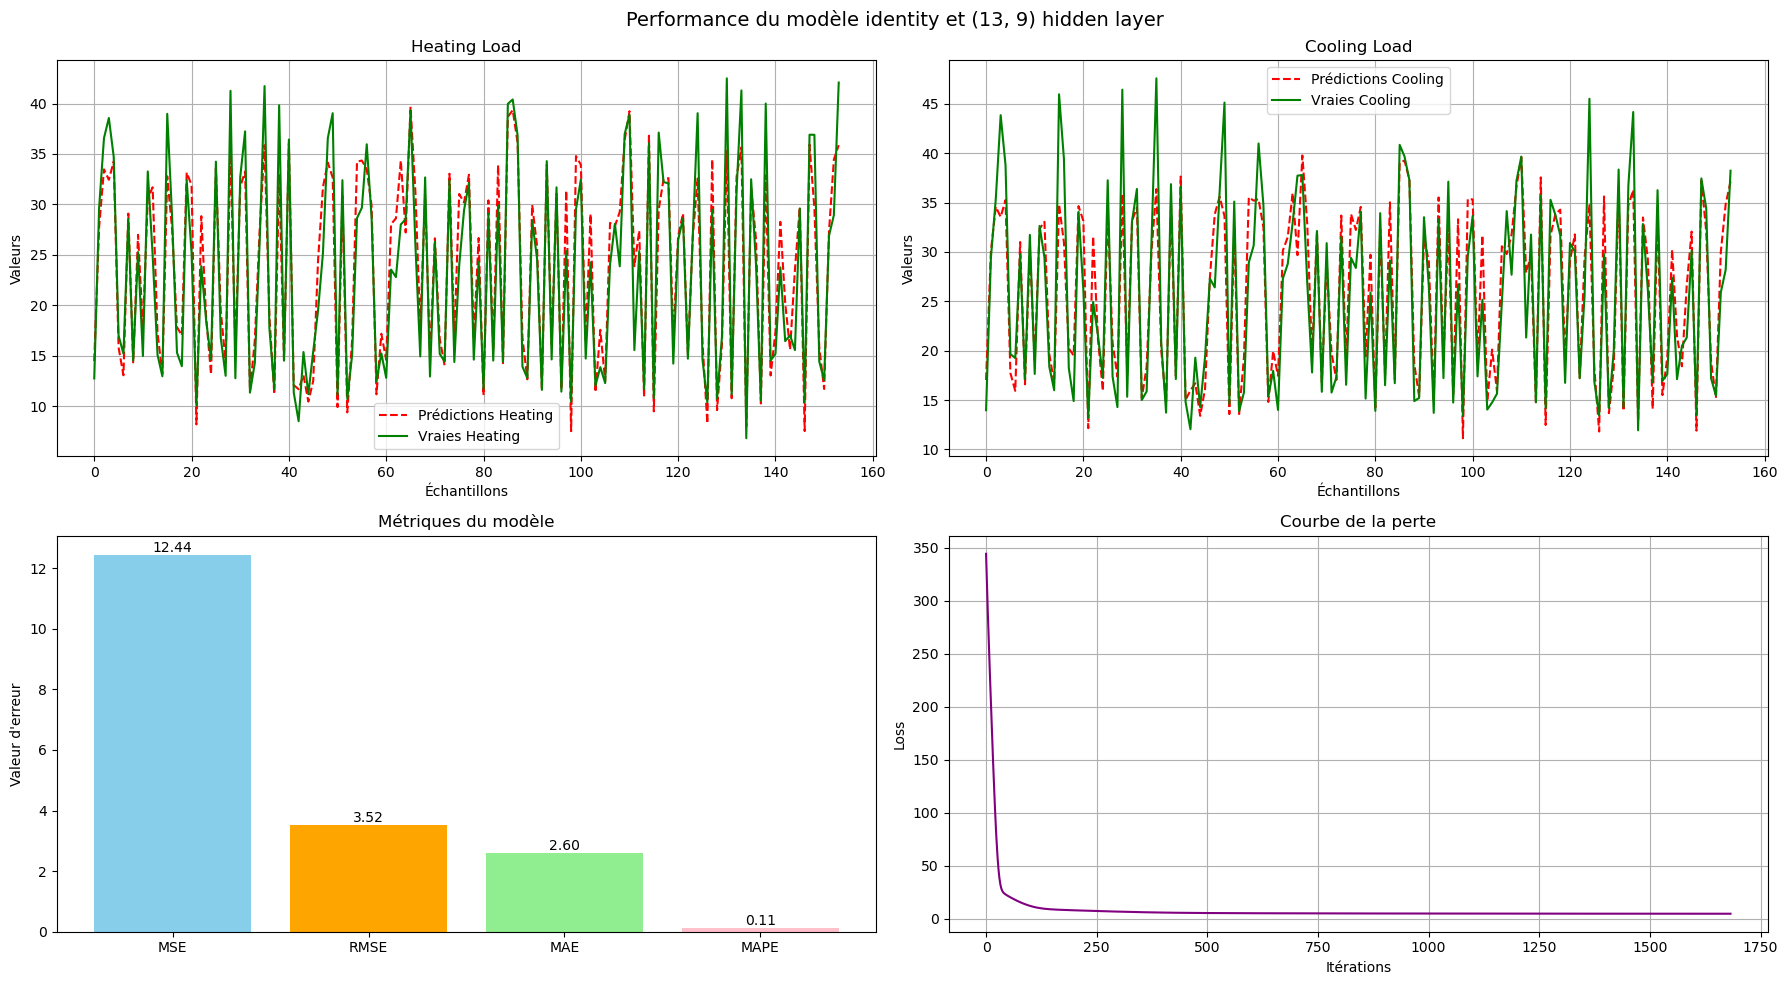

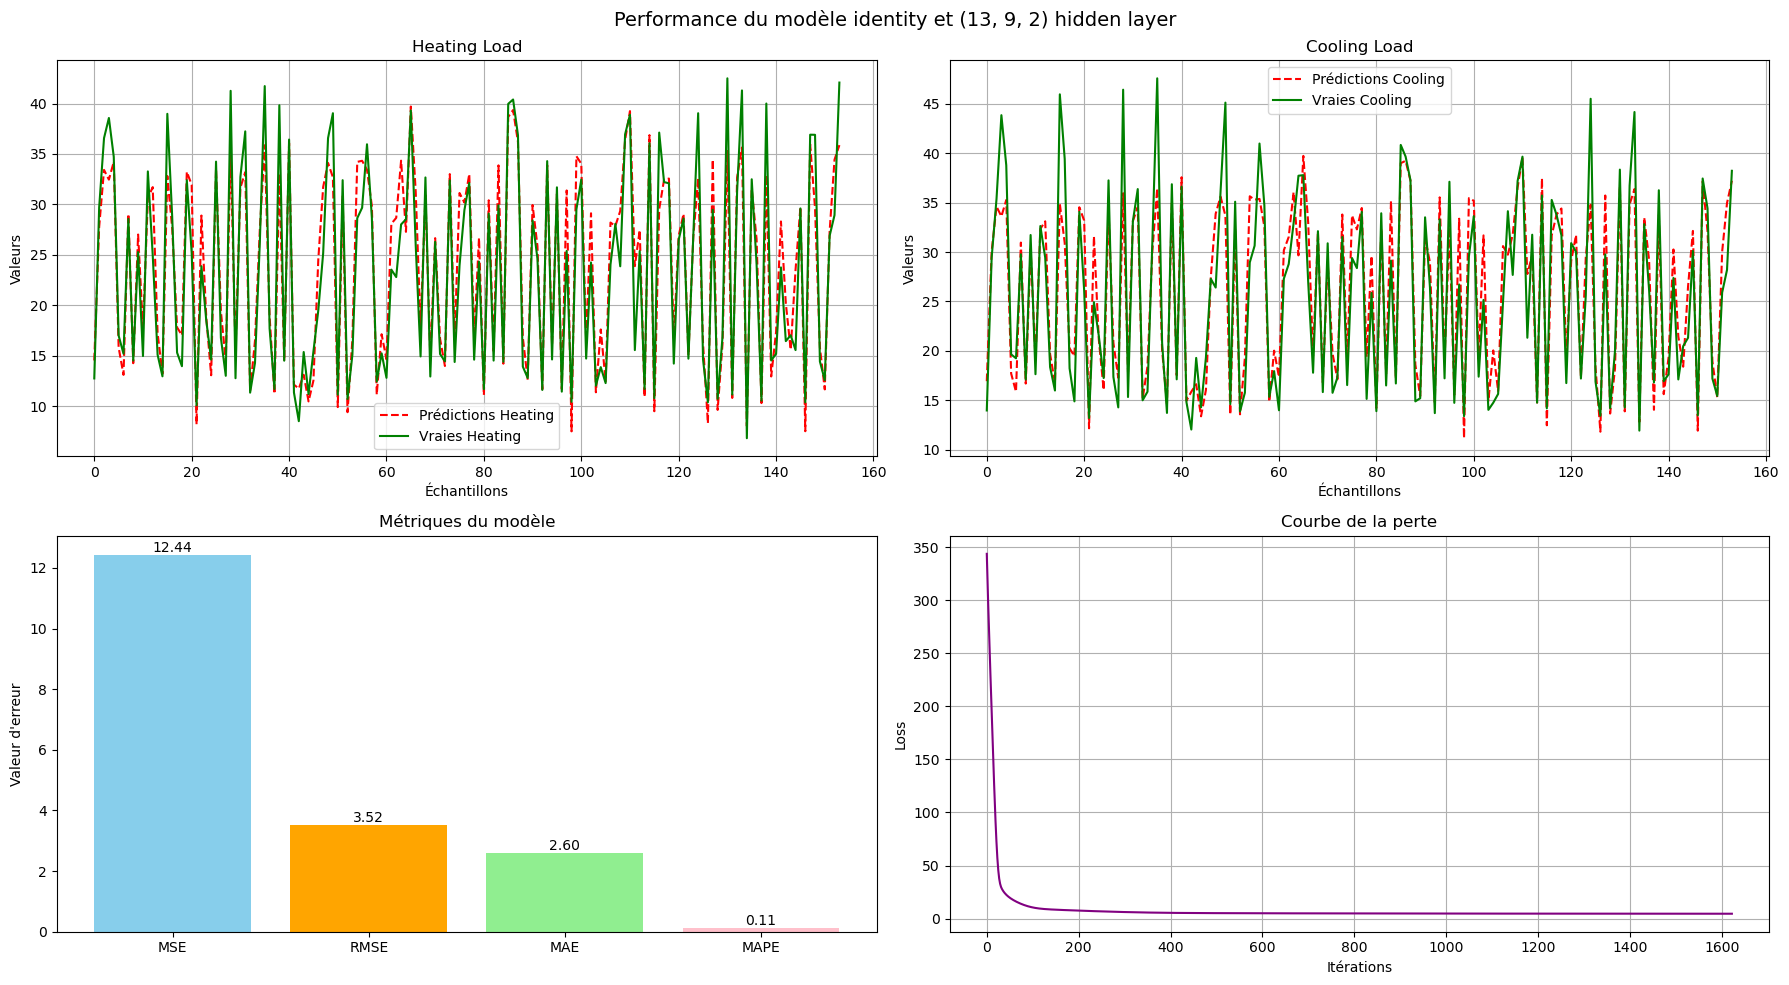

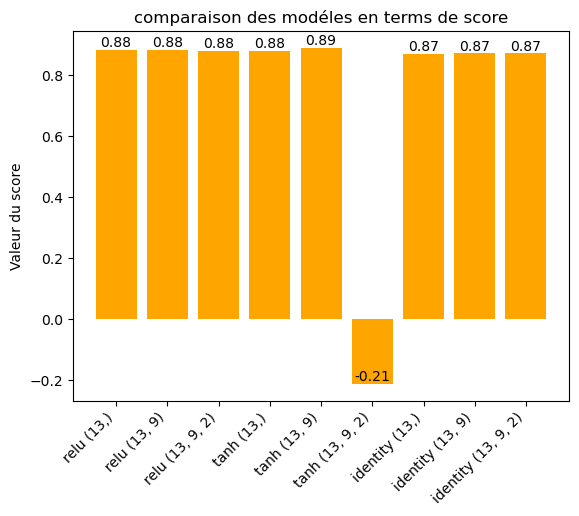

In [7]:
features_data = data.drop(columns=['Heating Load', 'Cooling Load'])
target = data[['Heating Load', 'Cooling Load']]

activation_functions = ['relu', 'tanh', 'identity']
layer_sizes = [(13,), (13, 9), (13,9, 2)]

models_label = []
models_scores = []

for activation in activation_functions:
    for size in layer_sizes:
        model = nn_back_propagation_model(hidden_layer_sizes=size, features_data=features_data, target_data=target, activation=activation)
        model_score = model.model_building()
        model.model_performance_viz(model_target=f"{activation} et {size} hidden layer")
        models_label.append(activation + " " + str(size))
        models_scores.append(model_score)

models_scores_comparaison(models_labels=models_label, models_scores=models_scores)